This notebook calculates the Average Treatment Effect for all variables using a Non-Parametric Causal approach

In [ ]:
import numpy as np
import pandas as pd
from dowhy import CausalModel
import dowhy.datasets
import networkx as nx

import statsmodels

import warnings
from sklearn.ensemble import RandomForestClassifier
# Ignore all warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt

In [3]:
graph = nx.read_gexf("data/notears_point2.gexf")

In [4]:
df = pd.read_csv("data/features.csv")

In [5]:
df.head()

,defense_type,def_detail,corner_detail,corner_type,dynamic_movement,shot_attempt,closely_marked,attacking_setup,att_detail
0,0,Man-Mark,Inswinger,0,1,0,1,0,Attackers start from near post
1,0,Man-Mark,Inswinger,0,1,0,0,0,Attackers start from near post
2,0,Man-Mark,Inswinger,0,1,0,0,2,Two way movement
3,0,Man-Mark,Inswinger,0,1,0,1,1,Runs from deeper areas - to the back post
4,0,Man-Mark,Inswinger,0,1,0,1,0,Attackers start from near post


In [6]:
features = df[["defense_type", 'corner_type','dynamic_movement', 'shot_attempt','closely_marked','attacking_setup']]

In [7]:
features.head()

,defense_type,corner_type,dynamic_movement,shot_attempt,closely_marked,attacking_setup
0,0,0,1,0,1,0
1,0,0,1,0,0,0
2,0,0,1,0,0,2
3,0,0,1,0,1,1
4,0,0,1,0,1,0


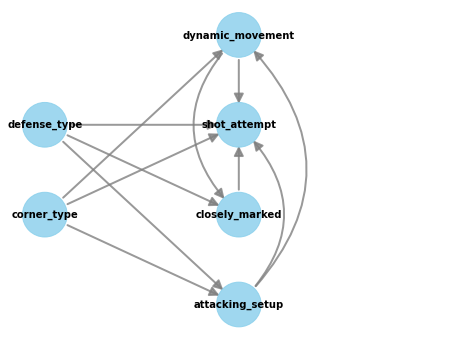

In [179]:
# causal_model = gcm.StructuralCausalModel(graph)

causal_model= CausalModel(
        data = features,
        graph=graph,
        treatment="corner_type",
        outcome='shot_attempt')


causal_model.view_model()



In [213]:
#refer -: https://www.pywhy.org/dowhy/main/example_notebooks/dowhy-conditional-treatment-effects.html
treatments = [ 'corner_type', 'dynamic_movement','closely_marked','defense_type']

for each in treatments:
    print(each)

    causal_model= CausalModel(
            data = features,
            graph=graph,
            treatment=each,
            outcome='shot_attempt')



    identified_estimand_cde = causal_model.identify_effect(estimand_type="nonparametric-cde",
                                                proceed_when_unidentifiable=True)
#     print(identified_estimand_cde)


    metalearner_estimate = causal_model.estimate_effect(identified_estimand_cde,
                                    method_name="backdoor.econml.metalearners.TLearner",
                                    confidence_intervals=False,
                                    control_value=0,
                                    treatment_value=1,
                                #     target_units = 1,
                                    # target_units = lambda df: df["shot_attempt"]>0,
                                    method_params={"init_params":{
                                                        'models': RandomForestClassifier(random_state=42)
                                                        },
                                                "fit_params":{}
                                                })
    print(metalearner_estimate.value)


corner_type
0.14171974522292993
dynamic_movement
-0.08280254777070063
closely_marked
0.0
defense_type
0.025477707006369428


In [185]:
#three different methods can be tried: random_common_cause, placebo_treatment_refuter, data_subset_refuter
#refer https://www.pywhy.org/dowhy/main/example_notebooks/DoWhy-The%20Causal%20Story%20Behind%20Hotel%20Booking%20Cancellations.html

refute2_results=causal_model.refute_estimate(identified_estimand_cde, metalearner_estimate,
        method_name="random_common_cause")
print(refute2_results)

Refute: Add a random common cause
Estimated effect:0.025477707006369428
New effect:0.03226114649681529
p value:0.77

